In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier   
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_excel("KTM.xlsx")

In [5]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [6]:
df.shape

(1518, 8)

In [7]:
df.describe()

,ID,Age
count,1518.000000,1518.000000
mean,759.500000,32.731225
std,438.353168,13.258555
min,1.000000,18.000000
25%,380.250000,22.000000
50%,759.500000,28.000000
75%,1138.750000,44.000000
max,1518.000000,60.000000


In [8]:
df.describe(include=['object'])  ### information of the categorical data

,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
count,1518,1518,1518,1518,1518,1518
unique,2,4,3,5,4,2
top,Female,Student,High End,180 to 220,Single,Purchased
freq,816,686,836,420,490,872


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 8 columns):
ID              1518 non-null int64
Age             1518 non-null int64
Gender          1518 non-null object
Occupation      1518 non-null object
Phone Type      1518 non-null object
Current Bike    1518 non-null object
Relationship    1518 non-null object
Response        1518 non-null object
dtypes: int64(2), object(6)
memory usage: 95.0+ KB


In [10]:
df.isnull().sum()

ID              0
Age             0
Gender          0
Occupation      0
Phone Type      0
Current Bike    0
Relationship    0
Response        0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
Number = LabelEncoder()   
df['Gender'] = Number.fit_transform(df['Gender'].astype('str'))
df['Occupation'] = Number.fit_transform(df['Occupation'].astype('str'))
df['Phone Type'] = Number.fit_transform(df['Phone Type'].astype('str'))
df['Current Bike'] = Number.fit_transform(df['Current Bike'].astype('str'))
df['Relationship'] = Number.fit_transform(df['Relationship'].astype('str'))
df['Response'] = Number.fit_transform(df['Response'].astype('str'))
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,1,0,0,1,1,0
1,2,27,0,1,2,4,3,1
2,3,39,0,3,0,1,2,0
3,4,20,0,3,1,4,2,0
4,5,29,1,2,0,1,1,1


In [12]:
del df['ID']

# Visualization

## Distribution Plot

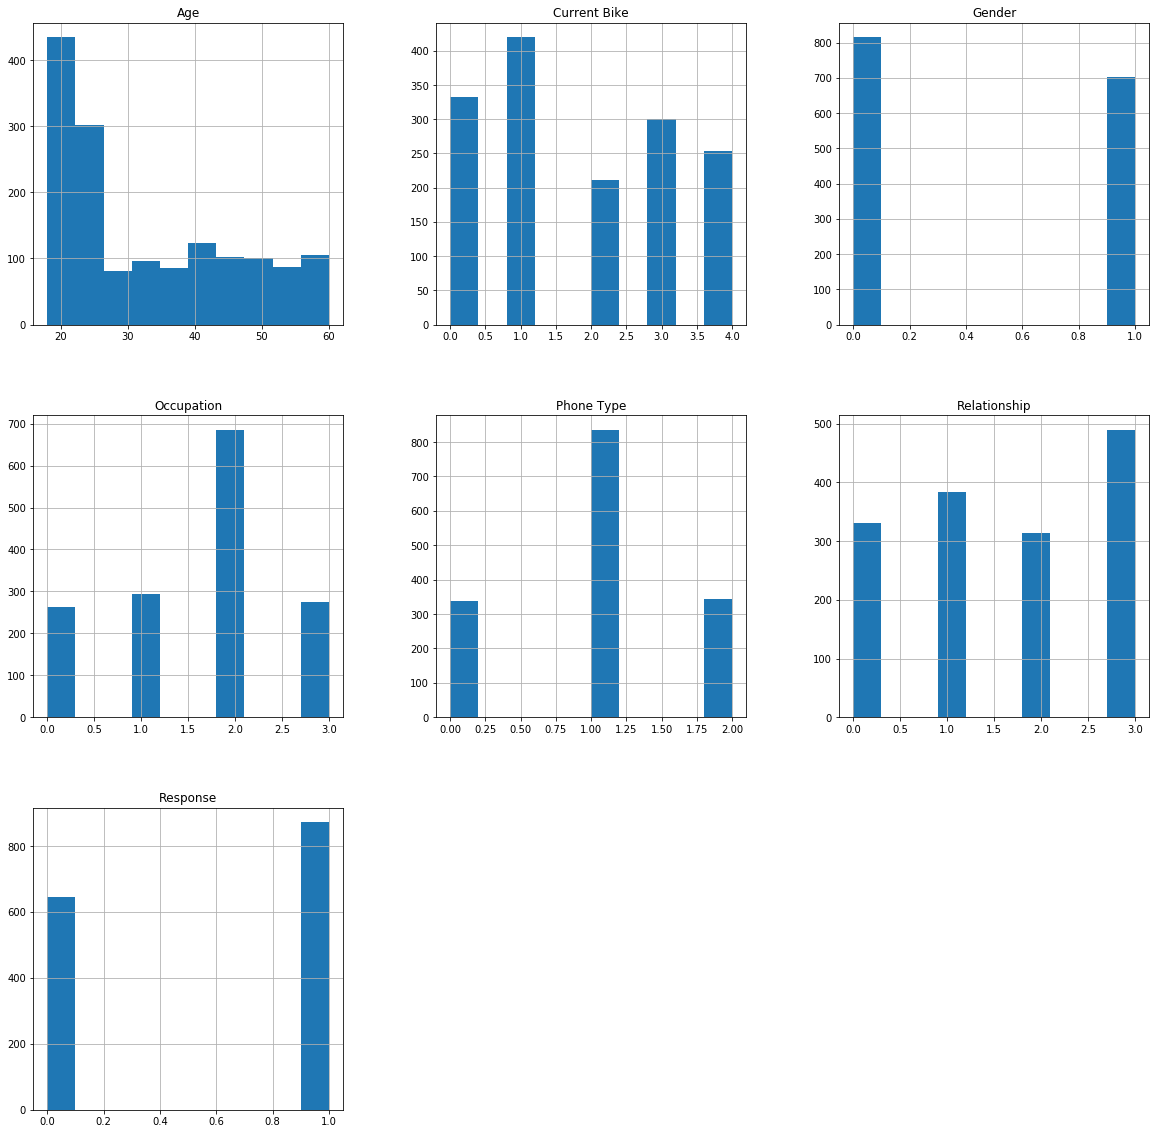

In [13]:
df.hist(bins=10, figsize=(20,20))
plt.show()

# Correlation

In [14]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
Age,1,0.0132263,-0.221953,-0.0134901,0.158903,-0.0661028,-0.552044
Gender,0.0132263,1,-0.0396162,-0.0213873,0.0623806,-0.237318,0.0634484
Occupation,-0.221953,-0.0396162,1,0.0207435,-0.100438,0.0543864,0.190147
Phone Type,-0.0134901,-0.0213873,0.0207435,1,-0.0489859,0.0184053,-0.0105309
Current Bike,0.158903,0.0623806,-0.100438,-0.0489859,1,-0.0105274,-0.178909
Relationship,-0.0661028,-0.237318,0.0543864,0.0184053,-0.0105274,1,0.0655469
Response,-0.552044,0.0634484,0.190147,-0.0105309,-0.178909,0.0655469,1


# Split into Train & Test

In [15]:
X = df.iloc[:,:-1].values
Y = df[['Response']].values

# Splitting the dataset into the Training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.75      0.71      0.73       126
           1       0.80      0.83      0.82       178

   micro avg       0.78      0.78      0.78       304
   macro avg       0.77      0.77      0.77       304
weighted avg       0.78      0.78      0.78       304

[[ 89  37]
 [ 30 148]]
accuracy is 0.7796052631578947


# Decision Tree

In [17]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                   max_features=None, max_leaf_nodes=None,
                                   min_impurity_split=1e-07, min_samples_leaf=1,
                                   min_samples_split=2, random_state=None, splitter='best')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       126
           1       0.82      0.79      0.81       178

   micro avg       0.78      0.78      0.78       304
   macro avg       0.77      0.77      0.77       304
weighted avg       0.78      0.78      0.78       304

[[ 95  31]
 [ 37 141]]
accuracy is 0.7763157894736842


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       126
           1       0.81      0.74      0.77       178

   micro avg       0.74      0.74      0.74       304
   macro avg       0.74      0.74      0.74       304
weighted avg       0.75      0.74      0.75       304

[[ 95  31]
 [ 47 131]]
accuracy is 0.743421052631579


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Instantiate Learning Model (k=39)
classifier = KNeighborsClassifier(n_neighbors=39)

# Fitting the model
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


array([[101,  25],
       [ 43, 135]], dtype=int64)

In [24]:
accuracy = accuracy_score(Y_test, Y_pred)* 100
print('Accuracy of our model is equal: ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal: 77.63%


In [25]:
error_rate = []

# K
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector 

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector 

Text(0, 0.5, 'Error rate')

<Figure size 432x288 with 0 Axes>

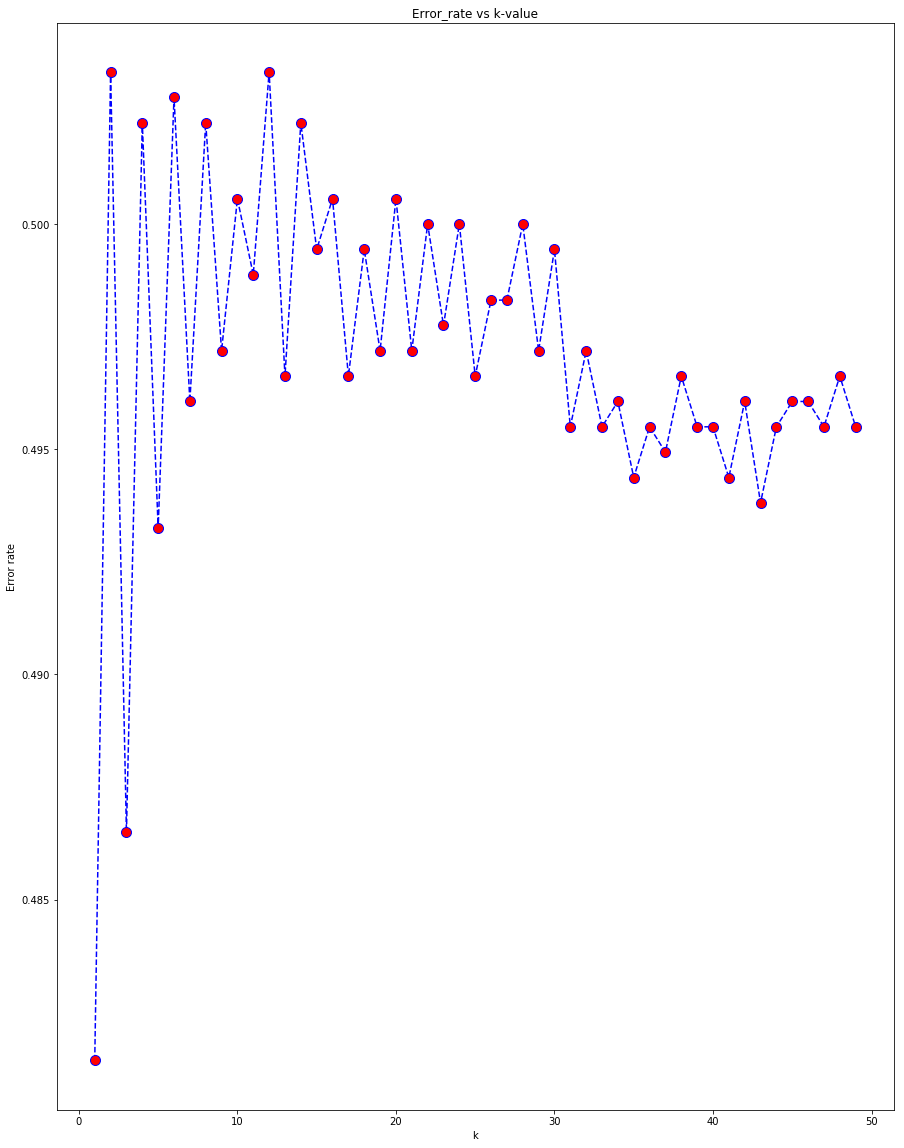

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(15,20))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error_rate vs k-value')
plt.xlabel('k')
plt.ylabel('Error rate')